In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_validation
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
import os
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rsruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rsruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
reviews = pd.read_csv('/Users/rsruti/Downloads/stack-overflow-data.csv')

In [116]:
reviews.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [117]:
reviews.shape

(40000, 2)

In [118]:
reviews.tags.nunique()

20

In [119]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']

<Figure size 864x504 with 0 Axes>

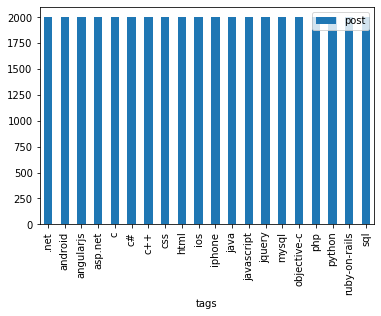

In [120]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,7))
reviews.groupby(['tags']).count().plot(kind="bar")

In [123]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    porter = PorterStemmer()
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    #print(text)
    text = ' '.join(porter.stem(token) for token in nltk.word_tokenize(text))
    return text
    
reviews['post'] = reviews['post'].apply(clean_text)
print_plot(10)

NameError: name 'print_plot' is not defined

In [ ]:
print(reviews.head(1)['post'])

In [124]:
reviews.post

0        caus behavior c # datetim type test public voi...
1        dynam html load ifram aspnet 40 site user save...
2        convert float valu minsec tri convert second m...
3        net framework 4 redistribut wonder get net fra...
4        tri calcul print mean return rather number pyt...
                               ...                        
39995    differ output end function rather main functio...
39996    multipl array way access store multipl array d...
39997    c differenti second key press use c would like...
39998    statego work # url append end url login respon...
39999    understand mechan intentservic tri understand ...
Name: post, Length: 40000, dtype: object

In [125]:
reviews_train_x, reviews_test_x, reviews_train_y, reviews_test_y = train_test_split(reviews.post, reviews.tags, random_state=40, test_size = 0.2, stratify=reviews.tags)

In [126]:
reviews_train_x.shape, reviews_test_x.shape

((32000,), (8000,))

In [127]:
reviews_train_x[1]

'dynam html load ifram aspnet 40 site user save entir html page backend databas want load dynam content div exist page content area coupl thing happen want css affect anyth outsid div first tri load badli form html would move imag div outsid content area around lot html page use base tag imag link want base tag respect insid div solut go tri use ifram set url anoth child page load dynam html page entir wonder better solut'

In [98]:
countVec = CountVectorizer()
tfIdfVec = TfidfTransformer()

reviews_vec = countVec.fit_transform(reviews['post'])

In [151]:
pipe = Pipeline([('countVec',countVec), ('tfIdfVec', tfIdfVec), ('clf', LogisticRegression(penalty='l2', C=3.0, max_iter=300))])

In [155]:
params_grid = {'clf__penalty':['l1', 'l2'], 'clf__C': [1.0, 2.0, 3.0], 'clf__max_iter' : [30, 50, 100]}

In [156]:
grid_search = GridSearchCV(pipe, params_grid, cv=10)

In [157]:
grid_search.fit(reviews.post, reviews.tags)

KeyboardInterrupt: 

In [216]:
grid_search.cv_results()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results'

In [145]:
grid_search.get_params()

{'cv': 10,
 'error_score': 'raise',
 'estimator__memory': None,
 'estimator__steps': [('countVec',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=None, vocabulary=None)),
  ('tfIdfVec',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))],
 'estimator__countVec': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class '

In [158]:
pipe.fit(reviews_train_x, reviews_train_y)

Pipeline(memory=None,
     steps=[('countVec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        s...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [159]:
reviews_test_pred = pipe.predict(reviews_test_x)

In [160]:
print(classification_report(reviews_test_y, reviews_test_pred, target_names = my_tags))

               precision    recall  f1-score   support

         java       0.73      0.68      0.70       400
         html       0.92      0.86      0.89       400
      asp.net       0.99      0.93      0.96       400
           c#       0.80      0.78      0.79       400
ruby-on-rails       0.84      0.89      0.86       400
       jquery       0.63      0.68      0.65       400
        mysql       0.85      0.78      0.81       400
          php       0.80      0.89      0.84       400
          ios       0.69      0.75      0.72       400
   javascript       0.66      0.66      0.66       400
       python       0.67      0.64      0.65       400
            c       0.87      0.82      0.84       400
          css       0.83      0.78      0.80       400
      android       0.85      0.86      0.86       400
       iphone       0.82      0.80      0.81       400
          sql       0.68      0.68      0.68       400
  objective-c       0.84      0.85      0.85       400
         

In [161]:
reviews_test_pred_scores = pipe.predict_proba(reviews_test_x)

In [112]:
#roc_auc_score(reviews_test_y, reviews_test_pred_scores, multi_class = 'ovr') #Works only for certain version of scikit learn

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [162]:
pipe1 = Pipeline([('countVec', countVec), ('tfIdfVec', tfIdfVec), ('clf', SGDClassifier(loss='log', penalty='l2', max_iter=300))])

In [163]:
pipe1.fit(reviews_train_x, reviews_train_y)

Pipeline(memory=None,
     steps=[('countVec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        s...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [166]:
reviews_test_pred1 = pipe1.predict(reviews_test_x)

In [173]:
print(classification_report(reviews_test_y, reviews_test_pred1))

               precision    recall  f1-score   support

         .net       0.73      0.66      0.69       400
      android       0.92      0.83      0.87       400
    angularjs       0.98      0.92      0.95       400
      asp.net       0.77      0.73      0.75       400
            c       0.82      0.86      0.84       400
           c#       0.60      0.63      0.62       400
          c++       0.80      0.74      0.77       400
          css       0.74      0.88      0.80       400
         html       0.67      0.70      0.69       400
          ios       0.68      0.66      0.67       400
       iphone       0.70      0.62      0.66       400
         java       0.87      0.81      0.84       400
   javascript       0.80      0.75      0.77       400
       jquery       0.84      0.84      0.84       400
        mysql       0.81      0.79      0.80       400
  objective-c       0.64      0.70      0.67       400
          php       0.84      0.82      0.83       400
       py

In [ ]:
#Pipe 1 is using log loss, so it is essentially a logistic regression model, should give same results as Pipe.
#Confirmed

In [168]:
pipe2 = Pipeline([('countVec', countVec), ('tfIdfVec', tfIdfVec), ('clf', SGDClassifier(loss='hinge', penalty='l2', max_iter=300))])

In [169]:
pipe2.fit(reviews_train_x, reviews_train_y)

Pipeline(memory=None,
     steps=[('countVec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        s...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [170]:
reviews_test_pred2 = pipe2.predict(reviews_test_x)

In [174]:
print(classification_report(reviews_test_y, reviews_test_pred2))

               precision    recall  f1-score   support

         .net       0.75      0.66      0.70       400
      android       0.88      0.91      0.90       400
    angularjs       0.95      0.96      0.95       400
      asp.net       0.81      0.80      0.80       400
            c       0.80      0.90      0.85       400
           c#       0.72      0.54      0.62       400
          c++       0.85      0.73      0.79       400
          css       0.75      0.90      0.82       400
         html       0.75      0.67      0.71       400
          ios       0.69      0.63      0.66       400
       iphone       0.69      0.62      0.65       400
         java       0.84      0.86      0.85       400
   javascript       0.82      0.81      0.81       400
       jquery       0.83      0.87      0.85       400
        mysql       0.83      0.78      0.81       400
  objective-c       0.67      0.70      0.69       400
          php       0.82      0.89      0.85       400
       py

In [217]:
pipe3 = Pipeline([('countVec', countVec), ('tfIdfVec', tfIdfVec), ('clf', RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy'))])

In [220]:
rf_cv = cross_validate(pipe3, reviews.post, reviews.tags, cv=10)

In [221]:
rf_cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [223]:
rf_cv['test_score'].mean() #Average accuracy of Random Forest

0.7680250000000001

## Using Keras

In [178]:
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [180]:
train_size = int(len(reviews) * .7)
train_posts = reviews['post'][:train_size]
train_tags = reviews['tags'][:train_size]

In [181]:
test_posts= reviews['post'][train_size:,]
test_tags = reviews['tags'][train_size:,]

In [182]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

In [183]:
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [206]:
binarizer = LabelBinarizer()
binarizer.fit(my_tags)
y_train = binarizer.transform(train_tags)
y_test = binarizer.transform(test_tags)
num_classes = train_tags.nunique()
print(num_classes)

20


In [207]:
#Alternate code :
encoder = LabelEncoder()
encoder.fit(train_tags)


y_train1 = encoder.transform(train_tags)
y_test1 = encoder.transform(test_tags)


num_classes1 = np.max(y_train1) + 1
y_train1 = utils.to_categorical(y_train1, num_classes1)
y_test1 = utils.to_categorical(y_test1, num_classes1)

In [195]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [196]:
y_train1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [199]:
y_train1[0] == y_train[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [209]:
model = Sequential()
model.add(Dense(512, input_shape = (max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [210]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [212]:
batch_size = 32
epochs= 2
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 25200 samples, validate on 2800 samples
Epoch 1/2
25200/25200 [==============================] - 5s 206us/step - loss: 1.0318 - acc: 0.7144 - val_loss: 0.6621 - val_acc: 0.7957
Epoch 2/2
25200/25200 [==============================] - 4s 176us/step - loss: 0.5732 - acc: 0.8163 - val_loss: 0.6527 - val_acc: 0.7932


In [214]:
score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose=1)

12000/12000 [==============================] - 0s 24us/step


In [215]:
print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.6352044554154078
Accuracy :  0.79675
